In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar


In [5]:
texto = '''
2.9.1.1 Field: Year
2.9.1.2 Field: Month
2.9.1.3 Field: Day
2.9.1.4 Field: Hour
2.9.1.5 Field: Minute
2.9.1.6 Field: Data Source and Uncertainty Flags
2.9.1.7 Field: Dry Bulb Temperature
2.9.1.8 Field: Dew Point Temperature
2.9.1.9 Field: Relative Humidity
2.9.1.10 Field: Atmospheric Station Pressure
2.9.1.11 Field: Extraterrestrial Horizontal Radiation
2.9.1.12 Field: Extraterrestrial Direct Normal Radiation
2.9.1.13 Field: Horizontal Infrared Radiation Intensity
2.9.1.14 Field: Global Horizontal Radiation
2.9.1.15 Field: Direct Normal Radiation
2.9.1.16 Field: Diffuse Horizontal Radiation
2.9.1.17 Field: Global Horizontal Illuminance
2.9.1.18 Field: Direct Normal Illuminance
2.9.1.19 Field: Diffuse Horizontal Illuminance
2.9.1.20 Field: Zenith Luminance
2.9.1.21 Field: Wind Direction
2.9.1.22 Field: Wind Speed
2.9.1.23 Field: Total Sky Cover
2.9.1.24 Field: Opaque Sky Cover
2.9.1.25 Field: Visibility
2.9.1.26 Field: Ceiling Height
2.9.1.27 Field: Present Weather Observation
'''

titulos = texto.split("\n")[1:-1]
nombres = [titulo.split(':')[1].lstrip() for titulo in titulos ]

f = '../data/001_raw/Casablanca.epw'


epw = pd.read_csv(f,skiprows=8,header=None,
                  names=nombres,
                  usecols=range(27))
renombres = {'Dry Bulb Temperature':'To',
            'Relative Humidity':'rh',
            'Global Horizontal Radiation':'Ig',
            'Wind Direction':'wd',
            'Wind Speed':'ws'}
epw.rename(columns=renombres,inplace=True )
epw.Minute = 0
epw.loc[epw.Hour==24,['Hour','Minute']] = [23,59]
epw.Year = 1993
epw['tiempo'] = epw.Year.astype('str') + '-' + epw.Month.astype('str') + '-' + epw.Day.astype('str') + ' ' + epw.Hour.astype('str') + ':' + epw.Minute.astype('str')
epw.tiempo = pd.to_datetime(epw.tiempo,format='%Y-%m-%d %H:%M')
epw.set_index('tiempo',inplace=True)

In [7]:
def manipula_epw(f,anio):

    epw = pd.read_csv(f,skiprows=8,header=None,
                      names=nombres,
                      usecols=range(27))
    renombres = {'Dry Bulb Temperature':'To',
                'Relative Humidity':'rh',
                'Global Horizontal Radiation':'Ig',
                'Wind Direction':'wd',
                'Wind Speed':'ws'}
    epw.rename(columns=renombres,inplace=True )
    epw.Minute = 0
    epw.loc[epw.Hour==24,['Hour','Minute']] = [23,59]
    epw.Year = anio
    epw['tiempo'] = epw.Year.astype('str') + '-' + epw.Month.astype('str') + '-' + epw.Day.astype('str') + ' ' + epw.Hour.astype('str') + ':' + epw.Minute.astype('str')
    epw.tiempo = pd.to_datetime(epw.tiempo,format='%Y-%m-%d %H:%M')
    epw.set_index('tiempo',inplace=True)
    return epw

<AxesSubplot:xlabel='tiempo'>

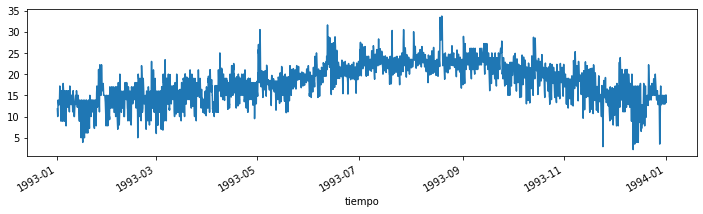

In [6]:
epw.To.plot(figsize=(12,3))

<AxesSubplot:xlabel='tiempo'>

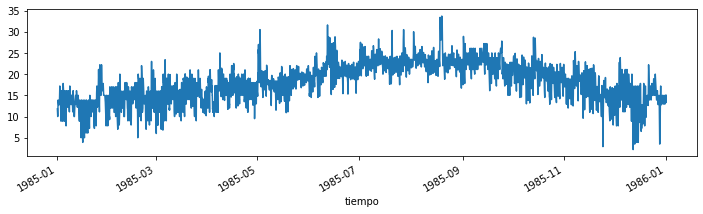

In [8]:
aaw = manipula_epw(f,1985,nombres)
aaw.To.plot(figsize=(12,3))

In [14]:
To = epw.To.groupby(by=[epw.index.month,epw.index.hour]).mean().unstack().T
rh = epw.rh.groupby(by=[epw.index.month,epw.index.hour]).mean().unstack().T
Ig = epw.Ig.groupby(by=[epw.index.month,epw.index.hour]).mean().unstack().T

In [25]:
meses

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [26]:
meses = calendar.month_name[1:]
meses =[ mes[:3] for mes in meses ]
meses

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

Text(0.5, 1.0, 'Irradiancia global')

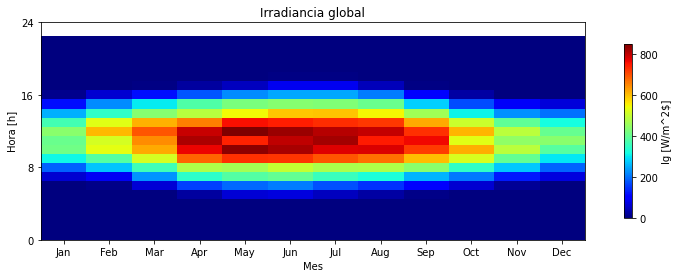

In [40]:
fig, ax = plt.subplots(figsize=(14,4))

ax.set_ylim(0,24)
ax.set_yticks(range(0,25,8))
ax.set_xticks(range(0,12))
ax.set_xticklabels(meses)
ax.set_ylabel('Hora [h]')
ax.set_xlabel('Mes')

p = ax.imshow(Ig,aspect=0.2,cmap='jet')

fig.colorbar(p,shrink=0.8,ticks=range(0,1000,200),label="Ig [W/m^2$]")
ax.set_title('Irradiancia global')

C:\Users\gbv\AppData\Local\Temp/ipykernel_1812/712570603.py:11: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(p,shrink=0.8,ticks=range(0,1000,200),label="Ig [W/m^2$]")


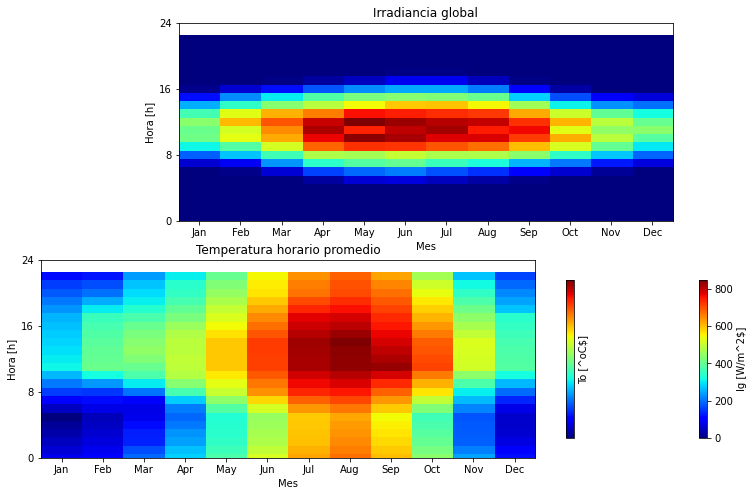

In [44]:
fig, ax = plt.subplots(2,figsize=(14,8))

ax[0].set_ylim(0,24)
ax[0].set_yticks(range(0,25,8))
ax[0].set_xticks(range(0,12))
ax[0].set_xticklabels(meses)
ax[0].set_ylabel('Hora [h]')
ax[0].set_xlabel('Mes')
ax[0].set_title('Irradiancia global')
p = ax[0].imshow(Ig,aspect=0.2,cmap='jet')
fig.colorbar(p,shrink=0.8,ticks=range(0,1000,200),label="Ig [W/m^2$]")


ax[1].set_ylim(0,24)
ax[1].set_yticks(range(0,25,8))
ax[1].set_xticks(range(0,12))
ax[1].set_xticklabels(meses)
ax[1].set_ylabel('Hora [h]')
ax[1].set_xlabel('Mes')
ax[1].set_title('Temperatura horario promedio')
p = ax[1].imshow(To,aspect=0.2,cmap='jet')
fig.colorbar(p,shrink=0.8,ticks=range(0,1000,200),label="To [^oC$]")



Text(0.5, 1.0, 'Temperatura horaria promedio')

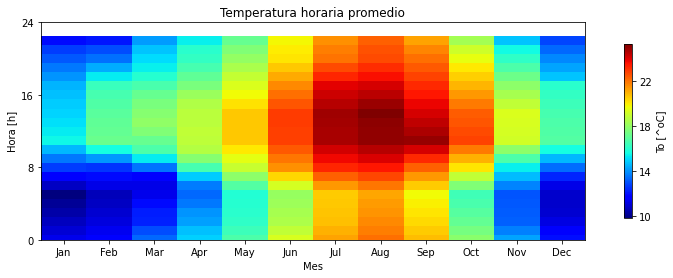

In [46]:
fig, ax = plt.subplots(figsize=(14,4))

ax.set_ylim(0,24)
ax.set_yticks(range(0,25,8))
ax.set_xticks(range(0,12))
ax.set_xticklabels(meses)
ax.set_ylabel('Hora [h]')
ax.set_xlabel('Mes')

p = ax.imshow(To,aspect=0.2,cmap='jet')

fig.colorbar(p,shrink=0.8,ticks=range(10,40,4),label="To [^oC]")
ax.set_title('Temperatura horaria promedio')